# MCompare Example

## What is MCompare?

MCompare is a python package that simplifies the data science process. It enables for quick comparison between models, the ability to track all the relevant artifacts relating to an experiment and providing all the extra functionality required to understand more about models (e.g. Learning Charts).

## Lets begin testing!

This notebook will test some of the basic functioanlity provided by the MCompare python package. This notebook will not build an in-depth end2end ML notebook, it will instead focus on the functionality of MCompare.

We begin by importing our modules and looking at some of the functions that are included.

In [6]:
# Reload python modules
%load_ext autoreload
%autoreload 2

In [22]:
import mcompare.model_wrapper as mw
import mcompare.classifiers_wrapper as cw
import mcompare.regressors_wrapper as rw
print(f'Version: {mw.__VERSION__)}')

0.0.1


In [23]:
help(cw.ClassificationModelData)

Help on class ClassificationModelData in module mcompare.classifiers_wrapper:

class ClassificationModelData(mcompare.model_wrapper.ModelData)
 |  ClassificationModelData(x, y, x_train, x_test, y_train, y_test, model, model_label_name, column_names, class_names, is_multi_classification=False)
 |  
 |  This class captures the data used to build models.
 |  
 |  Method resolution order:
 |      ClassificationModelData
 |      mcompare.model_wrapper.ModelData
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x, y, x_train, x_test, y_train, y_test, model, model_label_name, column_names, class_names, is_multi_classification=False)
 |      Create a model object to capture model information regarding the classification model.
 |      
 |      Params:
 |          - x (DataFrame) : The X dataset (independent variables)
 |          - y (array) : The label (dependent variable)
 |          - x_train (DataFrame) : The training split set from our X dataset
 |          - 

Here is another example of method provided by the package

In [24]:
help(rw.RegressionModelData.plot_learning_curves)

Help on function plot_learning_curves in module mcompare.regressors_wrapper:

plot_learning_curves(self, step_size=500)
    This plots a learning curve based on our model. This plots the models performance
    on the training set and the validation set - depending on a function of the training
    sets size.
    
    Hence, the model is trained multiple times on different sized subsets of the training data.
    
    Params:
        - step_size (int):
            This is the iteration step size the model will build for 
            (e.g. if = 500, it will build models using 500 rows at a time.)
    
    Returns:
        matplotlib chart - which is plotted to screen.



## Example Regression Model build

Lets take a look into an example ML model build utilising this package.

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [34]:
data = load_boston()
X_baseline = data.data
y_baseline = data.target
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline)

In [40]:
pipe = Pipeline([('reg', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[(&#39;reg&#39;, LinearRegression())])

In [39]:
set_config(display='diagram')
pipe
set_config(display='text')

In [42]:
reg_baseline_model = rw.RegressionModelData(
    x = X_baseline, 
    y = y_baseline, 
    x_train = X_train, 
    x_test = X_test, 
    y_train = y_train, 
    y_test = y_test, 
    model = pipe, 
    model_label_name = 'baseline_model_example', 
    column_names = data.feature_names
)

Mean squared error: 19.51
Root mean squared error:4.42
MAPE: 13.15%


In [43]:
list_of_all_models = []
list_of_all_models.append(reg_baseline_model)

Some of the advantages of this python package is that it has the ability to produce charts such as the learning curve straight out of the box. Just call the method `plot_learning_curves`

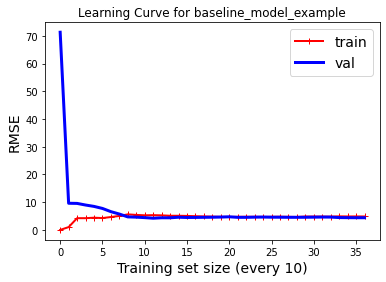

In [45]:
reg_baseline_model.plot_learning_curves(step_size=10)

You can also directly apply cross validation...

In [46]:
reg_baseline_model.get_cross_validation(scoring_metric='neg_mean_squared_error', cv_folds=7)

Scores:  [ 3.  3.  6.  6.  3. 12.  4.]
Mean of Scores:  5.0
Standard Deviation of Scores:  3.0


array([ -11.30795492,  -10.94743251,  -32.12487323,  -33.57836799,
        -10.54825524, -149.57087382,  -12.93285837])

## Build Classification Models

In [55]:
X_baseline_clf,y_baseline_clf = load_iris(return_X_y=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_baseline_clf, y_baseline_clf)

In [56]:
pipe_clf_1 = Pipeline([('clf', LogisticRegression(random_state=0))])
pipe_clf_1.fit(X_train_clf, y_train_clf)

Pipeline(steps=[(&#39;clf&#39;, LogisticRegression(random_state=0))])

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.846     1.000     0.917        11
           2      1.000     0.889     0.941        18

    accuracy                          0.947        38
   macro avg      0.949     0.963     0.953        38
weighted avg      0.955     0.947     0.948        38



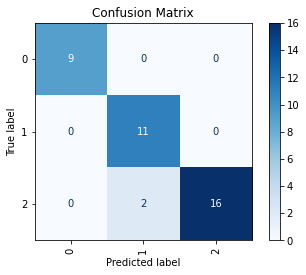

In [71]:
logit_clf = cw.ClassificationModelData(
    x = X_baseline_clf, 
    y = y_baseline_clf, 
    x_train = X_train_clf, 
    x_test = X_test_clf, 
    y_train = y_train_clf, 
    y_test = y_test_clf, 
    model = pipe_clf_1, 
    model_label_name = 'logistic_regression_model', 
    column_names = load_iris().feature_names, 
    class_names = [0, 1, 2], 
    is_multi_classification=True
)

In [58]:
pipe_clf_2 = Pipeline([('xgb_clf', XGBClassifier(random_state=0))])
pipe_clf_2.fit(X_train_clf, y_train_clf)

Pipeline(steps=[(&#39;xgb_clf&#39;,
                 XGBClassifier(base_score=0.5, booster=&#39;gbtree&#39;,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type=&#39;gain&#39;,
                               interaction_constraints=&#39;&#39;,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=&#39;()&#39;, n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective=&#39;multi:softprob&#39;, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method=&#39;exact&#39;,
                               validate_parameters=1, verbosity=None))])

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      0.846     1.000     0.917        11
           2      1.000     0.889     0.941        18

    accuracy                          0.947        38
   macro avg      0.949     0.963     0.953        38
weighted avg      0.955     0.947     0.948        38



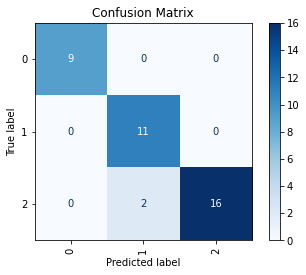

In [73]:
xgb_clf = cw.ClassificationModelData(
    x = X_baseline_clf, 
    y = y_baseline_clf, 
    x_train = X_train_clf, 
    x_test = X_test_clf, 
    y_train = y_train_clf, 
    y_test = y_test_clf, 
    model = pipe_clf_2, 
    model_label_name = 'xgboost_regression_model', 
    column_names = load_iris().feature_names, 
    class_names = [0, 1, 2], 
    is_multi_classification=True
)